In [81]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/survey.csv")  
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")

# Step 3: Preview first few rows
df.head()

Dataset loaded successfully!
Shape of the dataset: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [82]:
import matplotlib.pyplot as plt

In [83]:
# Check data types
print("Data Types:\n")
print(df.dtypes.value_counts())

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)


Data Types:

object    26
int64      1
Name: count, dtype: int64

Categorical columns:
['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

Numerical columns:
['Age']


In [84]:
# Count missing values per column
missing = df.isnull().sum()

# Calculate percentage of missing values
missing_percent = (missing / len(df)) * 100

# Create a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

# Filter only columns with at least 1 missing value, and sort by % missing
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Display the result
print("Missing Value Summary (Columns with missing data):")
missing_df



Missing Value Summary (Columns with missing data):


,Missing Values,Percentage (%)
comments,1095,86.973789
state,515,40.905481
work_interfere,264,20.969023
self_employed,18,1.429706


In [85]:
# Checking unique values to detect survey bias

for column in df.columns:
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Missing values: {df[column].isna().sum()}")
    print(f"Unique values: {df[column].unique()}")
    




Column: Timestamp
Number of unique values: 1246
Missing values: 0
Unique values: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']

Column: Age
Number of unique values: 53
Missing values: 0
Unique values: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

Column: Gender
Number of unique values: 49
Missing values:

In [86]:
# Outliers check for Numerical Columns :
print("Summary Statistics for Numerical Columns:")
df[numerical_cols].describe()


Summary Statistics for Numerical Columns:


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [87]:
# Copy of Original data :

df_clean = df.copy()


In [88]:
# Cleaning and Normalizing Gender feature :

def simplify_gender(g):
    g = str(g).lower().strip()
    
    male_keywords = ['male', 'm', 'cis male', 'man', 'msle', 'cis man', 'mail', 'malr', 'make', 'guy']
    female_keywords = ['female', 'f', 'cis female', 'woman', 'cis-female', 'femake', 'femail']
    
    for keyword in male_keywords:
        if keyword in g:
            return 'Male'
    for keyword in female_keywords:
        if keyword in g:
            return 'Female'
    
    return 'Unidentified'

df_clean['Gender'] = df_clean['Gender'].apply(simplify_gender)

# Check the result
df_clean['Gender'].value_counts()


Gender
Male            1193
Female            54
Unidentified      12
Name: count, dtype: int64

In [89]:
# Optimizing Age column
def age_bucket(age):
    if age < 18 or age > 100:
        return 'Invalid'
    elif age < 25:
        return '<25'
    elif 25 <= age <= 34:
        return '25–34'
    elif 35 <= age <= 44:
        return '35–44'
    else:
        return '45+'

df_clean['age_group'] = df_clean['Age'].apply(age_bucket)  

# Optionally filter out invalid ages
df_clean = df_clean[df_clean['age_group'] != 'Invalid']

print("Age group distribution:")
df_clean['age_group'].value_counts()


Age group distribution:


age_group
25–34    707
35–44    320
<25      156
45+       68
Name: count, dtype: int64

In [90]:
# Dealing with missing values :
# Calculate missing value counts and percentages
missing_count = df_clean.isnull().sum()
missing_percent = (missing_count / len(df_clean)) * 100

# Combine into a single DataFrame for easy viewing
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary.sort_values(by='Percentage', ascending=False, inplace=True)

print("Summary of Missing Values:")
missing_summary


Summary of Missing Values:


,Missing Values,Percentage
comments,1090,87.130296
state,513,41.007194
work_interfere,262,20.943245
self_employed,18,1.438849


In [91]:
# Simple Imputation for Low Risk (0–5%)
low_risk_cols = missing_summary[missing_summary['Percentage'] <= 5].index
for col in low_risk_cols:
    if df_clean[col].dtype == 'object':
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    else:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Medium Risk (5–30%) — Smart or domain-driven imputation
med_risk_cols = missing_summary[(missing_summary['Percentage'] > 5) & (missing_summary['Percentage'] <= 30)].index
for col in med_risk_cols:
    if df_clean[col].dtype == 'object':
        df_clean[col].fillna('Unknown', inplace=True)  # Domain-driven fallback
    else:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# High Risk (30–50%) — Impute only if important
high_risk_cols = missing_summary[(missing_summary['Percentage'] > 30) & (missing_summary['Percentage'] <= 50)].index
print("\n High Risk Columns (30–50% missing):")
print(high_risk_cols.tolist())

# You can manually choose to fill/drop based on importance

# Very High Risk (>50%) — Drop unless critical
very_high_risk_cols = missing_summary[missing_summary['Percentage'] > 50].index
print("\n Very High Risk Columns (>50% missing):")
print(very_high_risk_cols.tolist())

# Drop them if not critical:
df_clean.drop(columns=very_high_risk_cols, inplace=True)



 High Risk Columns (30–50% missing):
['state']

 Very High Risk Columns (>50% missing):
['comments']


In [92]:
print("Missing values after imputation:")
df_clean.isnull().sum().sum()


Missing values after imputation:


513

In [93]:
# One-Hot encode categorical columns:
# Select columns to encode (excluding target and ID columns)
encode_cols = ['Gender', 'age_group', 'family_history', 'remote_work', 'tech_company', 
               'benefits', 'care_options', 'mental_health_interview', 'obs_consequence']

# One-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=encode_cols, drop_first=True)

print("Encoded dataset shape:")
df_encoded.shape



Encoded dataset shape:


(1251, 33)

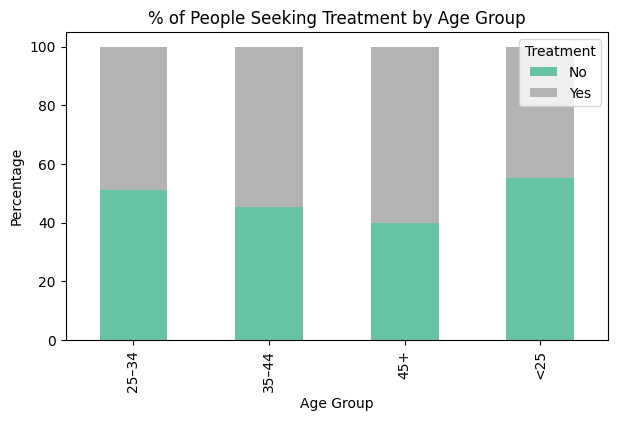

In [94]:
# Exploratory Data Analysis :

# % of People Seeking treatment by Age group
age_treatment = df_clean.groupby('age_group')['treatment'].value_counts(normalize=True).unstack() * 100
age_treatment.plot(kind='bar', stacked=True, figsize=(7,4), colormap='Set2')
plt.title('% of People Seeking Treatment by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(title='Treatment')
plt.show()


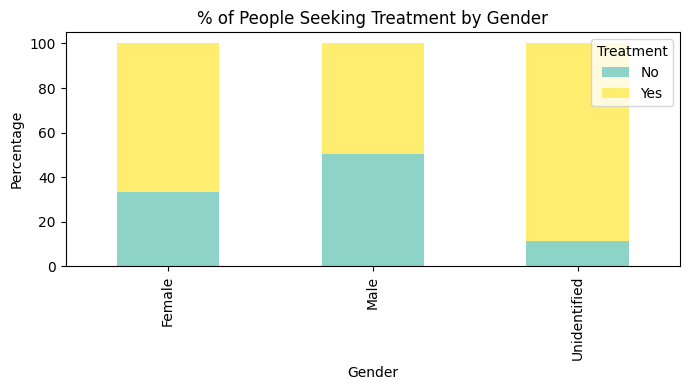

In [95]:
# % of people seeking treatment by gender
gender_treatment = df_clean.groupby('Gender')['treatment'].value_counts(normalize=True).unstack() * 100
gender_treatment.plot(kind='bar', stacked=True, figsize=(7,4), colormap='Set3')

plt.title('% of People Seeking Treatment by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


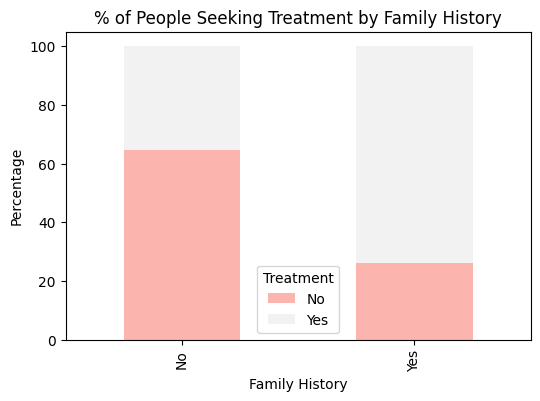

In [96]:
# % of People seeking treatment by Family History 
fam_treatment = df_clean.groupby('family_history')['treatment'].value_counts(normalize=True).unstack() * 100
fam_treatment.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel1')
plt.title('% of People Seeking Treatment by Family History')
plt.ylabel('Percentage')
plt.xlabel('Family History')
plt.legend(title='Treatment')
plt.show()


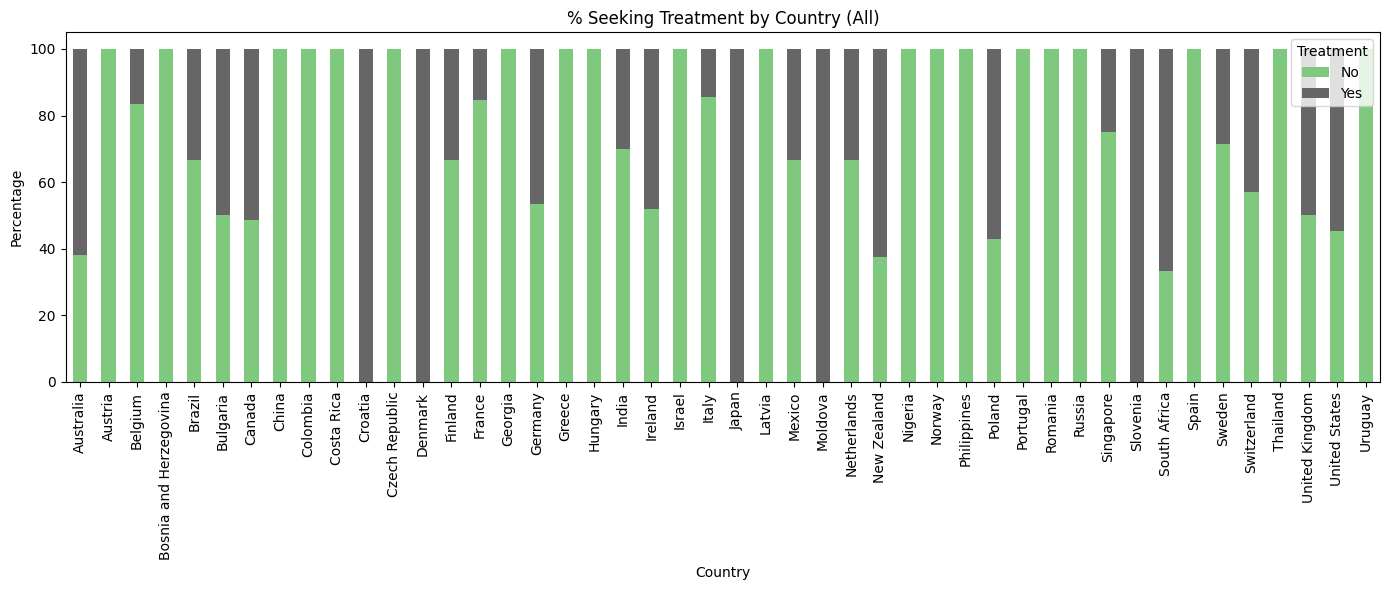

In [97]:
# % of people seeking treatment by Country
country_treatment = df_clean.groupby('Country')['treatment'].value_counts(normalize=True).unstack() * 100
country_treatment.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Accent')
plt.title('% Seeking Treatment by Country (All)')
plt.ylabel('Percentage')
plt.xlabel('Country')
plt.xticks(rotation=90)  # Rotate for readability
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


C:\Users\amanr\AppData\Local\Temp\ipykernel_33744\3562048684.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=remote_treatment_rate, x='remote_work', y='Treatment Rate (%)', palette='Set2')


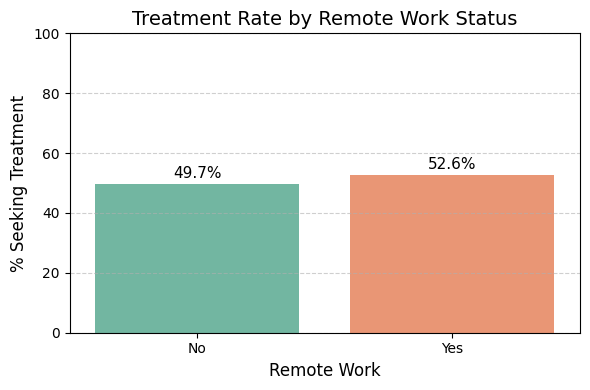

In [98]:
# % of People seeking treatment by 'Remote work' status 
import seaborn as sns
import matplotlib.pyplot as plt

#Group and calculate % of people who said "Yes" to treatment
remote_treatment_rate = (
    df_clean.groupby('remote_work')['treatment']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reset_index(name='Treatment Rate (%)')
)

# Step 2: Plot as a simple bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=remote_treatment_rate, x='remote_work', y='Treatment Rate (%)', palette='Set2')
plt.title('Treatment Rate by Remote Work Status', fontsize=14)
plt.xlabel('Remote Work', fontsize=12)
plt.ylabel('% Seeking Treatment', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

#  Show value on top of bars
for index, row in remote_treatment_rate.iterrows():
    plt.text(index, row['Treatment Rate (%)'] + 2, f"{row['Treatment Rate (%)']:.1f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()



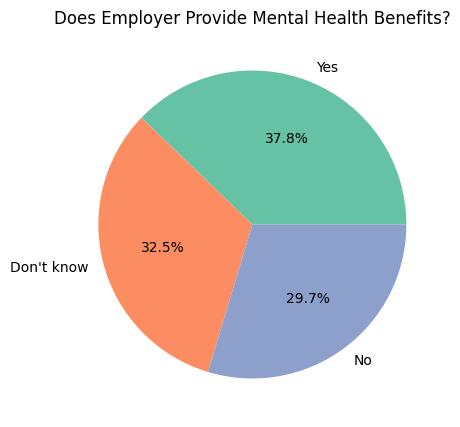

In [99]:
#Workplace Support and Mental Health Stigma
# Pie Chart – Access to Mental Health Benefits
df_clean['benefits'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), colors=['#66c2a5','#fc8d62','#8da0cb'])
plt.title('Does Employer Provide Mental Health Benefits?')
plt.ylabel('')
plt.show()



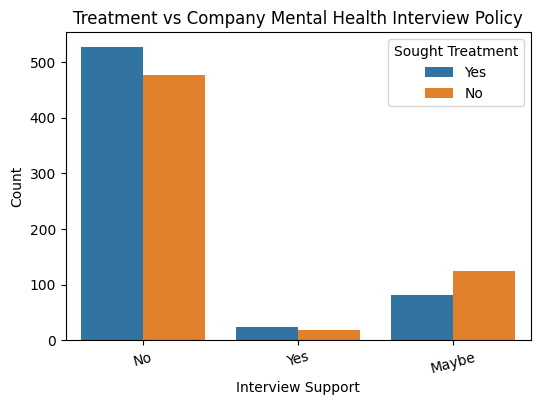

In [100]:
# Bar Plot – Mental Health Interview Policy
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='mental_health_interview', hue='treatment')
plt.title('Treatment vs Company Mental Health Interview Policy')
plt.xlabel('Interview Support')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=15)
plt.show()


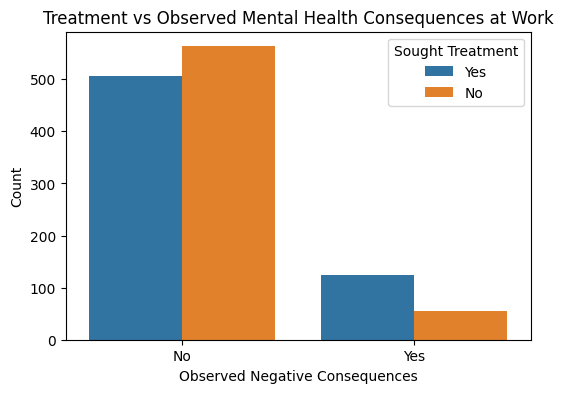

In [101]:
# Bar Plot – Observed Negative Consequences
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='obs_consequence', hue='treatment')
plt.title('Treatment vs Observed Mental Health Consequences at Work')
plt.xlabel('Observed Negative Consequences')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()


In [102]:
# Cross-correlation Between Support Factors

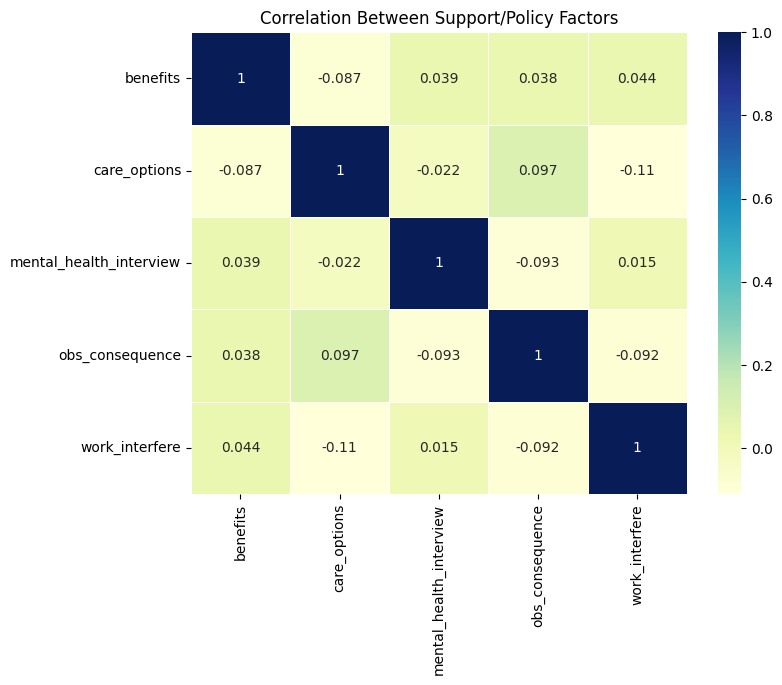

In [103]:
support_cols = ['benefits', 'care_options', 'mental_health_interview', 'obs_consequence', 'work_interfere']
support_encoded = df_clean[support_cols].apply(lambda col: pd.factorize(col)[0])  # convert to numeric codes

plt.figure(figsize=(8,6))
sns.heatmap(support_encoded.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Between Support/Policy Factors')
plt.show()


In [104]:
# 4. feature Engineering 
#1.Transform qualitative columns into binary flags that express a clear presence/absence (1/0) of support.
# 1. has_support → from 'care_options' column
df_clean['has_support'] = df_clean['care_options'].apply(lambda x: 1 if x.lower() in ['yes', 'somewhat'] else 0)

# 2. has_benefits → from 'benefits'
df_clean['has_benefits'] = df_clean['benefits'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# 3. remote_worker → from 'remote_work'
df_clean['remote_worker'] = df_clean['remote_work'].apply(lambda x: 1 if x.lower() == 'yes' else 0)


In [105]:
# Define mapping: you can extend this as needed
region_map = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'India': 'Asia',
    'Singapore': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}

# Create region column
df_clean['region'] = df_clean['Country'].map(region_map).fillna('Other')

# Optional: visualize value counts
df_clean['region'].value_counts()


region
North America    821
Europe           269
Other            116
Oceania           29
Asia              16
Name: count, dtype: int64

In [106]:
# Interaction features "Age*FamilyHistory"
# Convert family history to binary
df_clean['family_history_binary'] = df_clean['family_history'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Create interaction feature
df_clean['age_family_interaction'] = df_clean['Age'] * df_clean['family_history_binary']


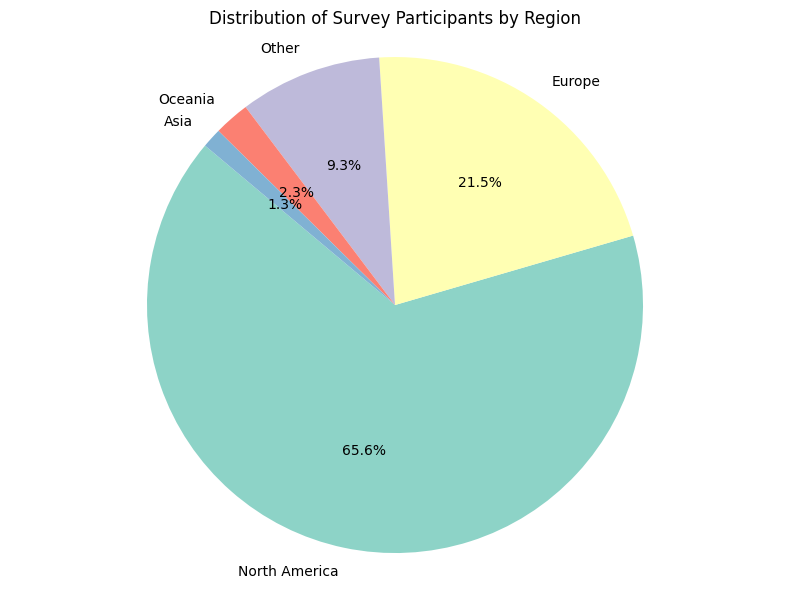

In [107]:
# Region Distribution :
import matplotlib.pyplot as plt

# Count the number of people in each region
region_counts = df_clean['region'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Survey Participants by Region')
plt.axis('equal')  # Make pie chart circular
plt.tight_layout()
plt.show()


In [108]:
# Predective Modelling
# Data Preparation for Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df_model = df_clean.copy()
df_model['treatment'] = LabelEncoder().fit_transform(df_model['treatment'])  # Yes=1, No=0

# Drop irrelevant or text columns
drop_cols = ['Country', 'comments', 'state', 'Age', 'family_history', 'gender', 'age_group', 'remote_work', 'benefits', 'care_options', 'mental_health_interview', 'obs_consequence', 'work_interfere']
df_model.drop(columns=drop_cols, inplace=True, errors='ignore')

# One-hot encode remaining categorical features
df_model = pd.get_dummies(df_model, drop_first=True)

# Split into X (features) and y (target)
X = df_model.drop('treatment', axis=1)
y = df_model['treatment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Display results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
results_df


,Model,Accuracy,F1-Score,ROC-AUC
2,Gradient Boosting,0.677291,0.682353,0.713383
3,SVM,0.669323,0.655602,0.710850
0,Logistic Regression,0.673307,0.674603,0.699756
1,Random Forest,0.657371,0.658730,0.699468


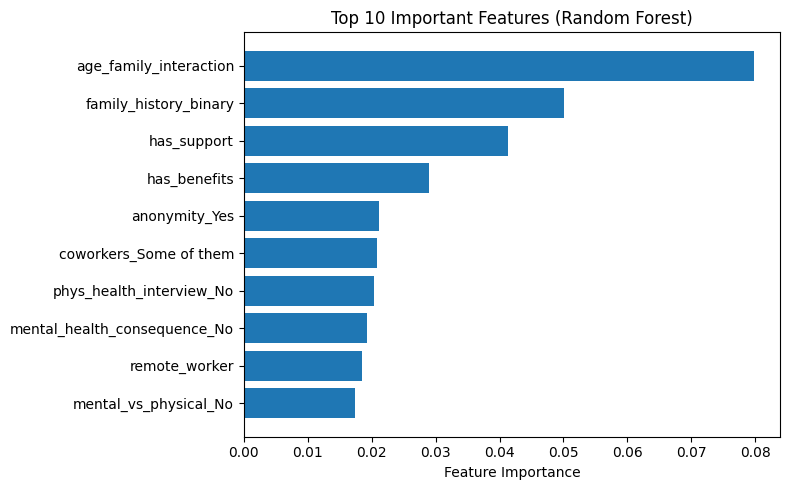

In [110]:
import matplotlib.pyplot as plt

rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns

# Plot top 10 features
top_idx = importances.argsort()[-10:]
plt.figure(figsize=(8,5))
plt.barh(range(len(top_idx)), importances[top_idx], align='center')
plt.yticks(range(len(top_idx)), [features[i] for i in top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


In [112]:
import shap

In [115]:
# Use TreeExplainer for tree-based models
# Step 1: Use TreeExplainer for your trained random forest
explainer = shap.TreeExplainer(rf_model)

# Step 2: Calculate SHAP values safely
shap_values = explainer.shap_values(X_test, check_additivity=False)

In [116]:
type(shap_values)

numpy.ndarray

C:\Users\amanr\AppData\Local\Temp\ipykernel_33744\1917568653.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type='bar')
C:\Users\amanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\amanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\plots\_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed

<Figure size 640x480 with 0 Axes>

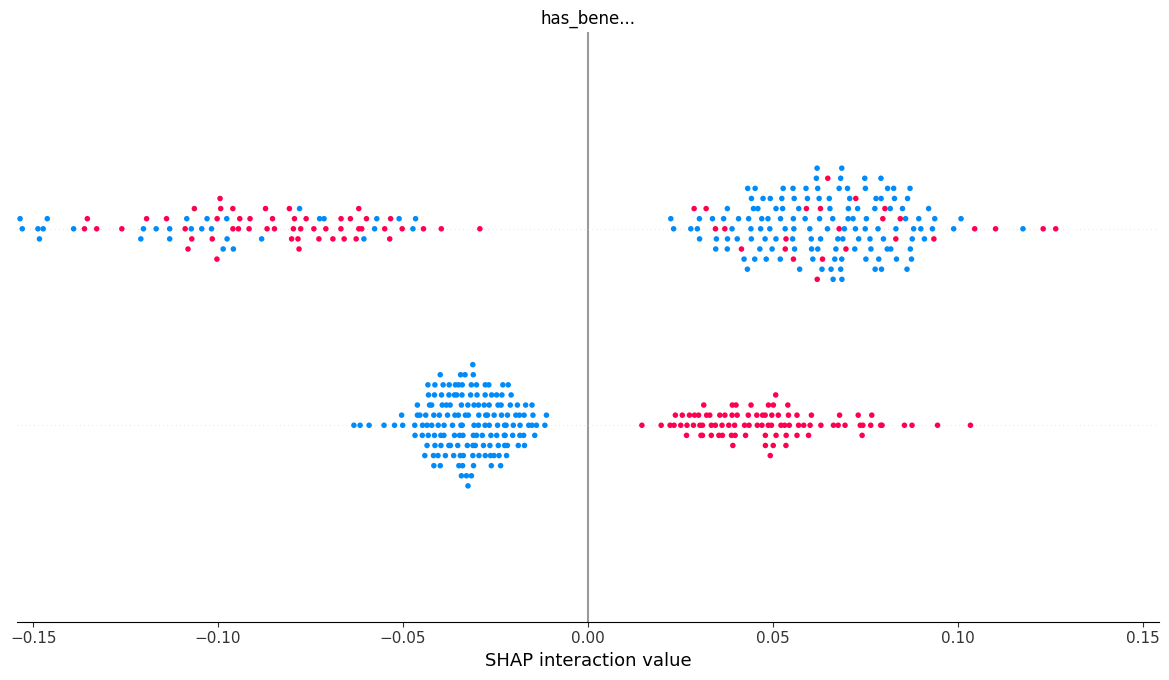

C:\Users\amanr\AppData\Local\Temp\ipykernel_33744\1917568653.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
C:\Users\amanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\amanr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\plots\_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future ve

<Figure size 640x480 with 0 Axes>

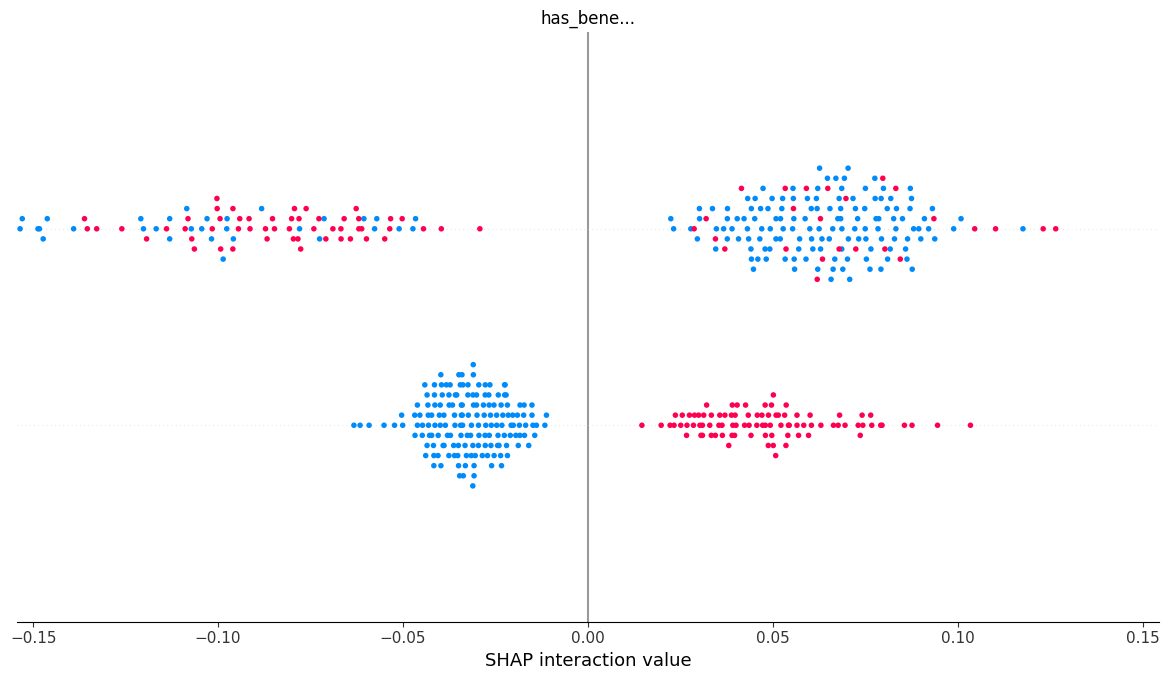

In [117]:
# Summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')
shap.summary_plot(shap_values, X_test)

In [125]:
# Create the output folder if it doesn't exist
import os
os.makedirs("outputs", exist_ok=True)

# Save df_clean to CSV
df_clean.to_csv("outputs/df_cleaned.csv", index=False)

print("Cleaned data saved to outputs/df_cleaned.csv")


Cleaned data saved to outputs/df_cleaned.csv


(1251, 33)